#**Protein Structure complexity Analysis**

##**1. Introduction**

Explain Data

**Complexity calculation features**
*   Shannon entropy
*   Number of transitions
*   Fractal Dimension

**Biological features**

*   Enzymes
*   Transcription Factor




  

##**2. Data Preprocessing**

##**Import the Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**Load the dataset**


In [32]:
df = pd.read_csv("File_TF.csv")

In [4]:
df.head()

,FASTA Filename,Shannon Entropy,Number of Transitions
0,fasta_uni/P22736.fasta,1.400063,76
1,fasta_uni/Q9H334.fasta,1.340514,70
2,fasta_uni/P48436.fasta,1.480286,68
3,fasta_uni/P28347.fasta,1.358966,64
4,fasta_uni/Q06330.fasta,1.494394,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FASTA Filename         96 non-null     object 
 1   Shannon Entropy        96 non-null     float64
 2   Number of Transitions  96 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.describe()

,Shannon Entropy,Number of Transitions
count,96.000000,96.000000
mean,1.413392,74.114583
std,0.087730,31.009292
min,1.182538,11.000000
25%,1.361412,51.750000
50%,1.430294,69.500000
75%,1.474063,83.250000
max,1.578222,166.000000


The statistical summary of the dataset provides insights into two key variables: Shannon Entropy and Number of Transitions. Shannon Entropy, a measure of uncertainty or randomness in the data, shows a mean value of 1.413, indicating a moderate level of uncertainty. The standard deviation of 0.088 suggests that the entropy values are fairly consistent with a small spread around the mean. The minimum entropy value observed is 1.183, representing the least amount of randomness, while the maximum value is 1.578, indicating the highest level of randomness. The 25th percentile is at 1.361, the median at 1.430 and the 75th percentile at 1.475, showing a relatively tight clustering of values around the mean.

In contrast, the Number of Transitions, which likely refers to the number of changes or shifts in the data, exhibits a mean value of 74.115, suggesting a moderate level of activity. However, the standard deviation of 31.009 indicates a wider spread of transition values around the mean, reflecting significant variability. The minimum number of transitions recorded is 11, showing the least activity, while the maximum is 166, indicating the highest level of activity observed. The 25th percentile is at 51.750, the median at 69.500 and the 75th percentile at 86.250, highlighting the broader range of values compared to Shannon Entropy.

The interpretation of these statistics reveals that Shannon Entropy values are quite consistent, with most values clustering around the mean, indicating a stable level of uncertainty in the data. On the other hand, the Number of Transitions shows more variability, suggesting that while the average number of transitions is moderate, there are significant fluctuations with some observations showing very high or very low activity. This comprehensive overview of the distribution and variability of these two variables is crucial for understanding patterns, detecting anomalies or making informed decisions based on the data.

##**Exploratory Data Analysis**

##**Correlation**

In [12]:
#Finding correlations between the variables using iloc function

corr_df = df.iloc[:,1:3].corr()
corr_df

,Shannon Entropy,Number of Transitions
Shannon Entropy,1.00000,0.28712
Number of Transitions,0.28712,1.00000


##**Heat map**

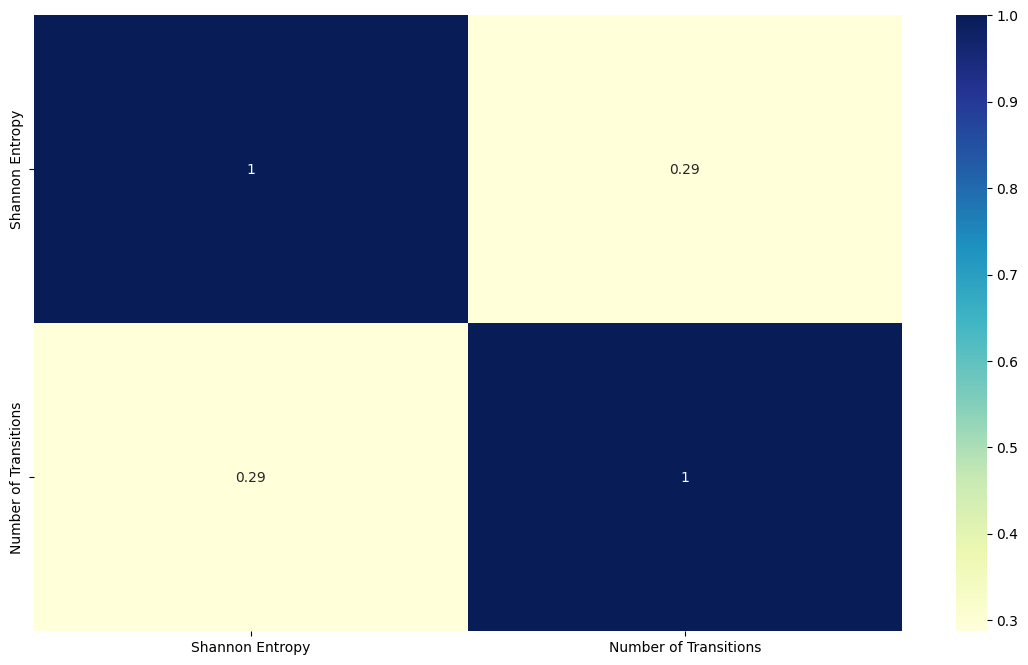

In [13]:
#Creating a heatmap to pinpoint the columns in the DataFrame exhibiting high correlation.

plt.figure(figsize=(14, 8))
sns.heatmap(data=corr_df, annot=True, cmap='YlGnBu')  # 'annot=True' fills the R values in the heatmap cells.

plt.show()

##**Boxplot analysis**

<ipython-input-14-2a354c498a75>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=num[i], width=0.3, palette="Set1")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-14-2a354c498a75>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

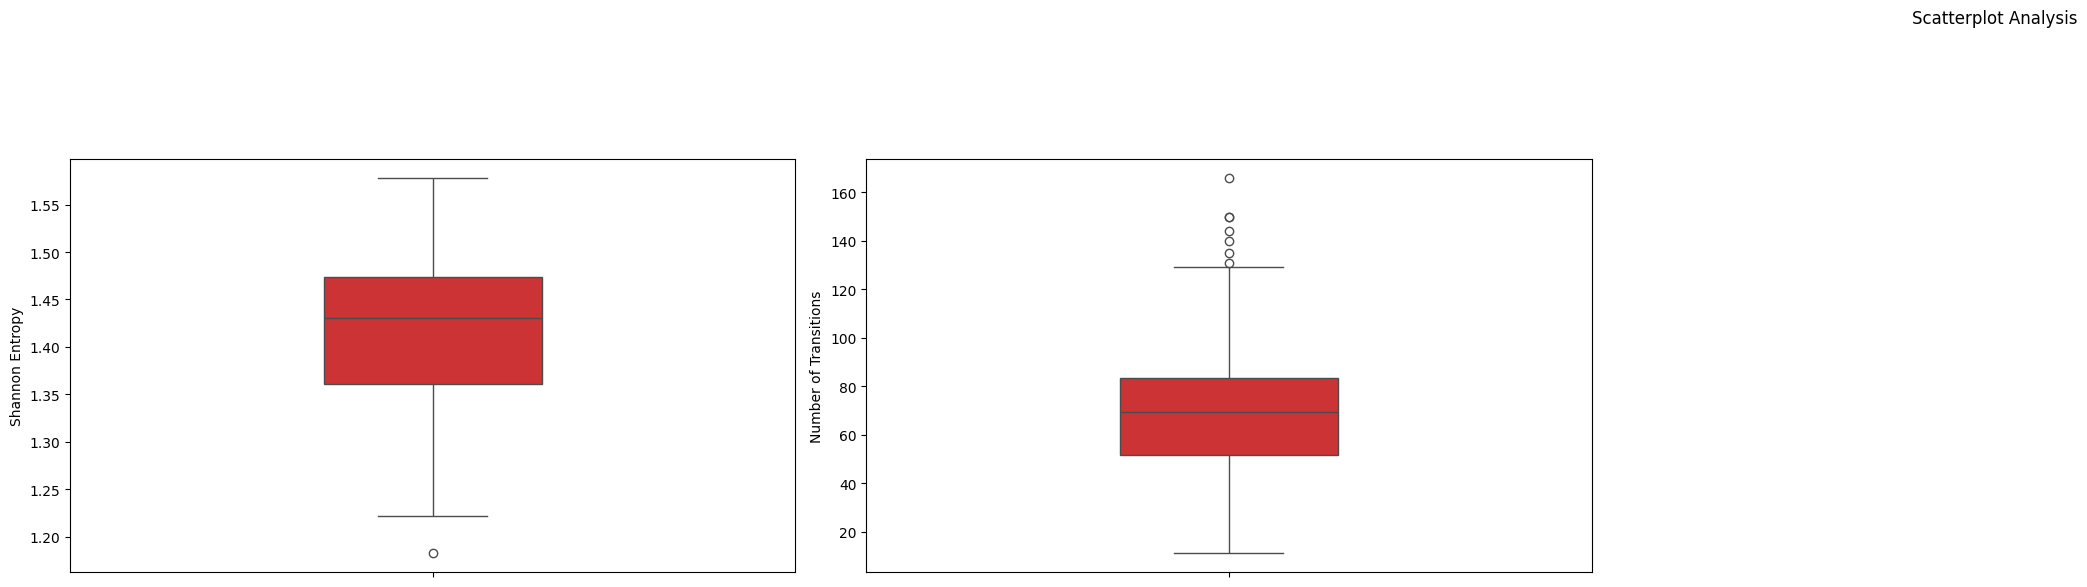

In [14]:
num=df.select_dtypes(include=[np.number])
fig = plt.figure(figsize = (40, 50))
j = 0
for i in num.columns:
    plt.subplot(11, 5, j+1)
    j += 1
    sns.boxplot(y=num[i], width=0.3, palette="Set1")
fig.suptitle('Scatterplot Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

**Scatter plot - Just to have an Idea**

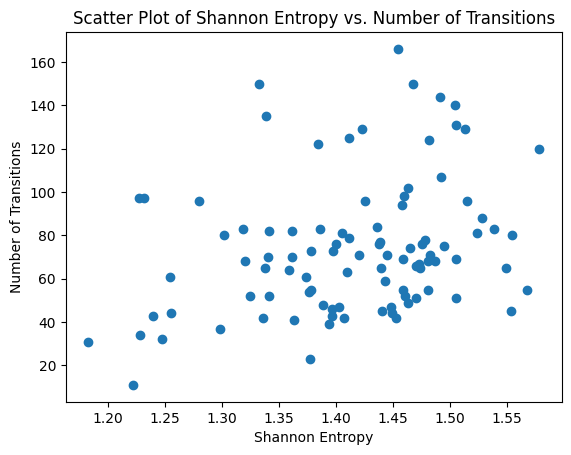

In [15]:
# Assuming data is in a DataFrame called df
plt.scatter(df['Shannon Entropy'], df['Number of Transitions'])
plt.xlabel('Shannon Entropy')
plt.ylabel('Number of Transitions')
plt.title('Scatter Plot of Shannon Entropy vs. Number of Transitions')
plt.show()

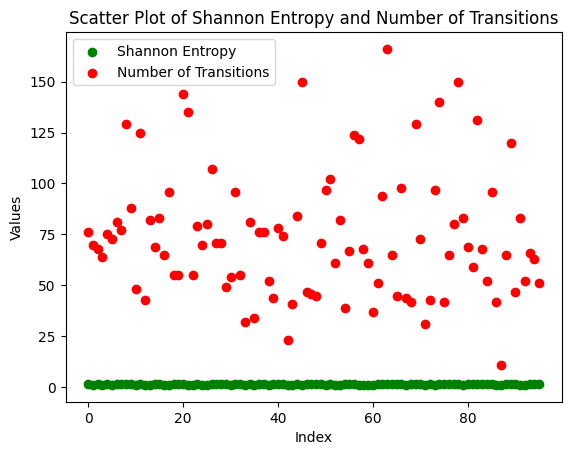

In [16]:
plt.scatter(df.index, df['Shannon Entropy'], color='green', label='Shannon Entropy')
plt.scatter(df.index, df['Number of Transitions'], color='red', label='Number of Transitions')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of Shannon Entropy and Number of Transitions')
plt.legend()
plt.show()

**Line Plot of dataset**

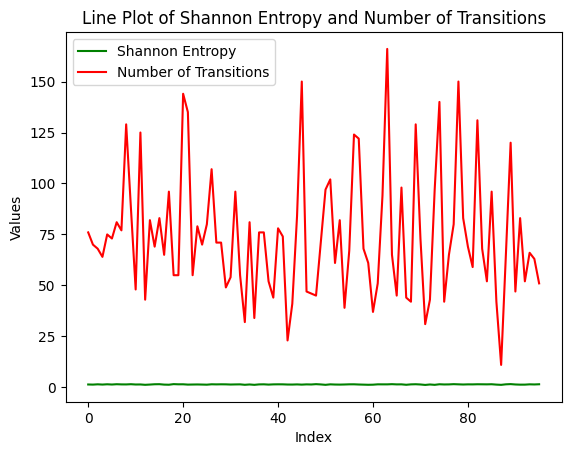

In [17]:
plt.plot(df.index, df['Shannon Entropy'], color='green', label='Shannon Entropy')
plt.plot(df.index, df['Number of Transitions'], color='red', label='Number of Transitions')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of Shannon Entropy and Number of Transitions')
plt.legend()
plt.show()

**Violin Plot of Shannon Entropy and Number of Transitions**

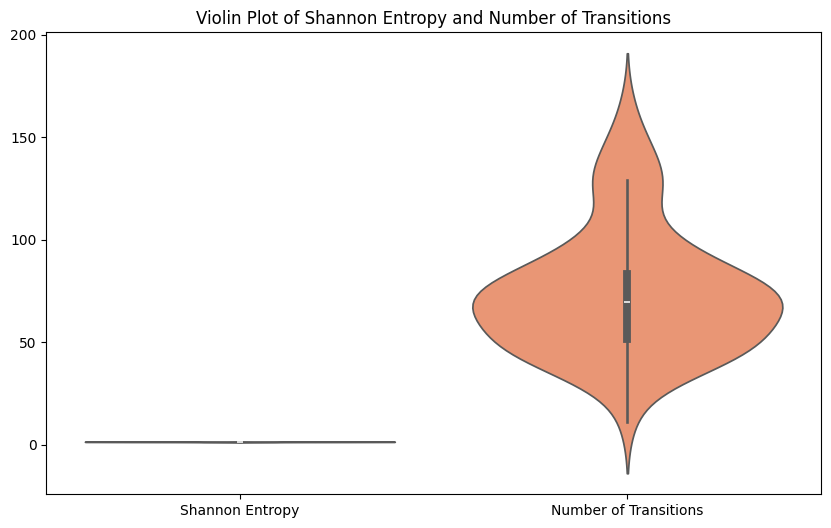

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, palette="Set2")
plt.title('Violin Plot of Shannon Entropy and Number of Transitions')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

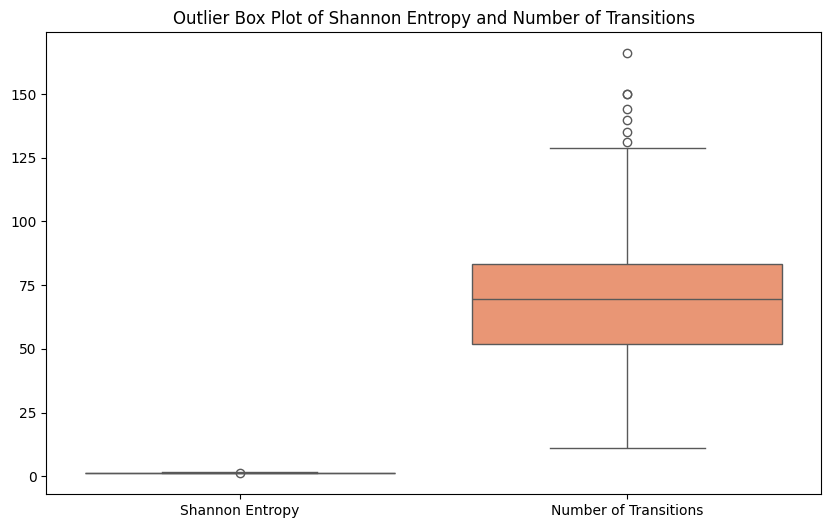

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette="Set2")
plt.title('Outlier Box Plot of Shannon Entropy and Number of Transitions')
plt.show()

**Convert values in rows to lists**

In [36]:
# convert Shannon Entropy values to a list
SE_list = df.Shannon_Entropy.tolist()
print(SE_list)

# convert Number of Transitions values to a list
NT_list = df.No_of_Transitions.tolist()
print(NT_list)

[1.400063043, 1.340513908, 1.480286188, 1.358966209, 1.494393995, 1.377868223, 1.523245485, 1.438154671, 1.422531117, 1.5284302, 1.388616551, 1.411224798, 1.238896229, 1.361149331, 1.505404844, 1.538255233, 1.337401555, 1.279630097, 1.567668805, 1.480364839, 1.491134239, 1.33818303, 1.378108928, 1.410990183, 1.361499651, 1.30137837, 1.491764084, 1.444948676, 1.482695341, 1.462694779, 1.376120212, 1.425026089, 1.458526955, 1.247386097, 1.405388484, 1.228292493, 1.437830115, 1.475458136, 1.341367956, 1.449034991, 1.478388175, 1.464635007, 1.377076801, 1.363173294, 1.435561455, 1.332080383, 1.448011205, 1.396798164, 1.553226356, 1.419661773, 1.231622247, 1.46321479, 1.373143975, 1.340702107, 1.393527026, 1.47290414, 1.481723648, 1.384011112, 1.319998988, 1.254116468, 1.297688732, 1.469887755, 1.45749536, 1.454640486, 1.549093619, 1.440026173, 1.459651803, 1.25532269, 1.452700508, 1.513051116, 1.397541645, 1.182538184, 1.395967075, 1.22668002, 1.504566971, 1.407132335, 1.439010056, 1.55473

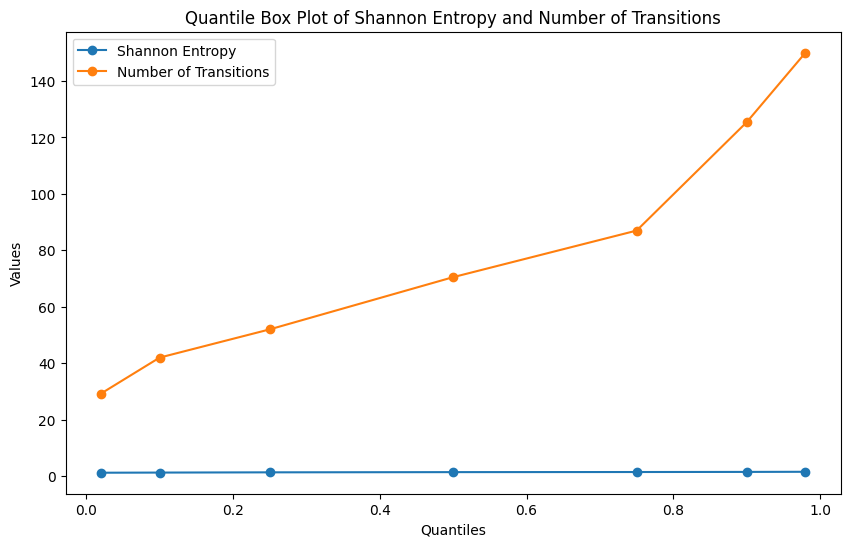

In [40]:

data = {
    'Shannon Entropy': (1.400063043, 1.340513908, 1.480286188, 1.358966209, 1.494393995, 1.377868223, 1.523245485, 1.438154671, 1.422531117, 1.5284302, 1.388616551, 1.411224798, 1.238896229, 1.361149331, 1.505404844, 1.538255233, 1.337401555, 1.279630097, 1.567668805, 1.480364839, 1.491134239, 1.33818303, 1.378108928, 1.410990183, 1.361499651, 1.30137837, 1.491764084, 1.444948676, 1.482695341, 1.462694779, 1.376120212, 1.425026089, 1.458526955, 1.247386097, 1.405388484, 1.228292493, 1.437830115, 1.475458136, 1.341367956, 1.449034991, 1.478388175, 1.464635007, 1.377076801, 1.363173294, 1.435561455, 1.332080383, 1.448011205, 1.396798164, 1.553226356, 1.419661773, 1.231622247, 1.46321479, 1.373143975, 1.340702107, 1.393527026, 1.47290414, 1.481723648, 1.384011112, 1.319998988, 1.254116468, 1.297688732, 1.469887755, 1.45749536, 1.454640486, 1.549093619, 1.440026173, 1.459651803, 1.25532269, 1.452700508, 1.513051116, 1.397541645, 1.182538184, 1.395967075, 1.22668002, 1.504566971, 1.407132335, 1.439010056, 1.554739008, 1.467783435, 1.385807882, 1.458943338, 1.443058605, 1.50523331, 1.48693042, 1.460582997, 1.514592067, 1.335435445, 1.222014372, 1.473597765, 1.578222416),# enter the actual data
    'Number of Transitions': (76, 70, 68, 64, 75, 73, 81, 77, 129, 88, 48, 125, 43, 82, 69, 83, 65, 96, 55, 55, 144, 135, 55, 79, 70, 80, 107, 71, 71, 49, 54, 96, 55, 32, 81, 34, 76, 76, 52, 44, 78, 74, 23, 41, 84, 150, 47, 46, 45, 71, 97, 102, 61, 82, 39, 67, 124, 122, 68, 61, 37, 51, 94, 166, 65, 45, 98, 44, 42, 129, 73, 31, 43, 97, 140, 42, 65, 80, 150, 83, 69, 59, 131, 68, 52, 96, 42, 11, 65, 120)# enter the actual data
}
df = pd.DataFrame(data)

# Define quantiles to be displayed
quantiles = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]



# Create a function to calculate quantiles
def quantile_boxplot(data, quantiles):
    quantile_values = data.quantile(quantiles)
    return quantile_values

# Calculate quantiles for each column
quantile_data = df.apply(quantile_boxplot, quantiles=quantiles)

# Plotting the quantile box plot
plt.figure(figsize=(10, 6))
for column in quantile_data.columns:
    plt.plot(quantiles, quantile_data[column], marker='o', label=column)

plt.xlabel('Quantiles')
plt.ylabel('Values')
plt.title('Quantile Box Plot of Shannon Entropy and Number of Transitions')
plt.legend()
plt.show()

**Improve the visibility of Shannon entropy fluctuations**

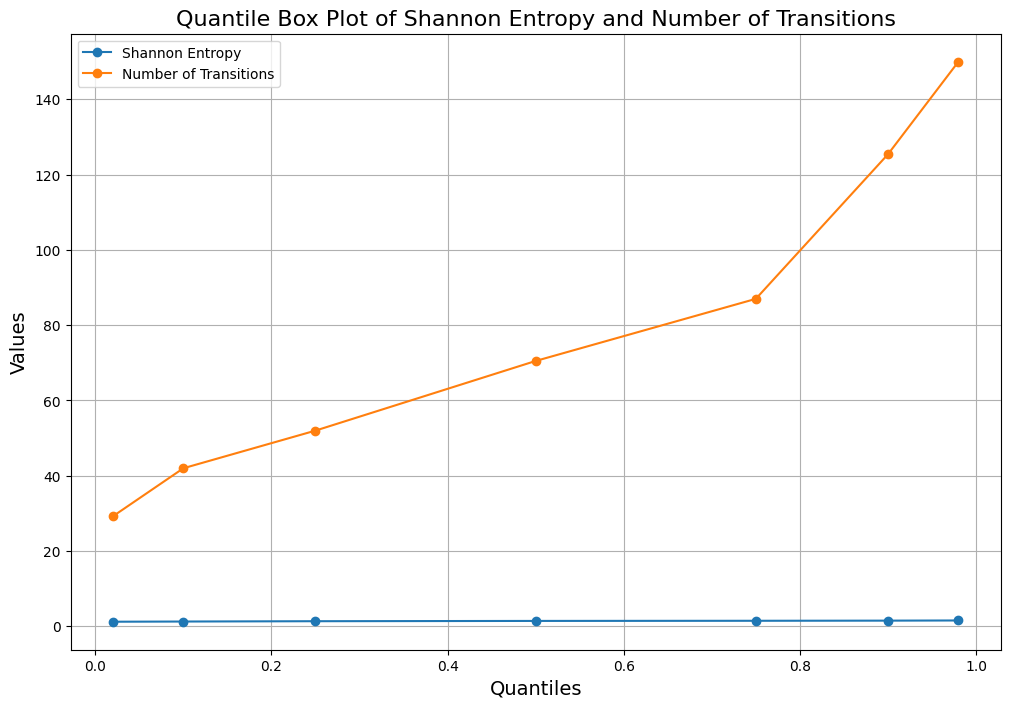

In [41]:
data = {
    'Shannon Entropy': (1.400063043, 1.340513908, 1.480286188, 1.358966209, 1.494393995, 1.377868223, 1.523245485, 1.438154671, 1.422531117, 1.5284302, 1.388616551, 1.411224798, 1.238896229, 1.361149331, 1.505404844, 1.538255233, 1.337401555, 1.279630097, 1.567668805, 1.480364839, 1.491134239, 1.33818303, 1.378108928, 1.410990183, 1.361499651, 1.30137837, 1.491764084, 1.444948676, 1.482695341, 1.462694779, 1.376120212, 1.425026089, 1.458526955, 1.247386097, 1.405388484, 1.228292493, 1.437830115, 1.475458136, 1.341367956, 1.449034991, 1.478388175, 1.464635007, 1.377076801, 1.363173294, 1.435561455, 1.332080383, 1.448011205, 1.396798164, 1.553226356, 1.419661773, 1.231622247, 1.46321479, 1.373143975, 1.340702107, 1.393527026, 1.47290414, 1.481723648, 1.384011112, 1.319998988, 1.254116468, 1.297688732, 1.469887755, 1.45749536, 1.454640486, 1.549093619, 1.440026173, 1.459651803, 1.25532269, 1.452700508, 1.513051116, 1.397541645, 1.182538184, 1.395967075, 1.22668002, 1.504566971, 1.407132335, 1.439010056, 1.554739008, 1.467783435, 1.385807882, 1.458943338, 1.443058605, 1.50523331, 1.48693042, 1.460582997, 1.514592067, 1.335435445, 1.222014372, 1.473597765, 1.578222416),# enter the actual data
    'Number of Transitions': (76, 70, 68, 64, 75, 73, 81, 77, 129, 88, 48, 125, 43, 82, 69, 83, 65, 96, 55, 55, 144, 135, 55, 79, 70, 80, 107, 71, 71, 49, 54, 96, 55, 32, 81, 34, 76, 76, 52, 44, 78, 74, 23, 41, 84, 150, 47, 46, 45, 71, 97, 102, 61, 82, 39, 67, 124, 122, 68, 61, 37, 51, 94, 166, 65, 45, 98, 44, 42, 129, 73, 31, 43, 97, 140, 42, 65, 80, 150, 83, 69, 59, 131, 68, 52, 96, 42, 11, 65, 120)# enter the actual data
}
df = pd.DataFrame(data)

# Define quantiles to be displayed
quantiles = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]

df = pd.DataFrame(data)

# Define quantiles to be displayed
quantiles = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]

# Create a function to calculate quantiles
def quantile_boxplot(data, quantiles):
    quantile_values = data.quantile(quantiles)
    return quantile_values

# Calculate quantiles for each column
quantile_data = df.apply(quantile_boxplot, quantiles=quantiles)

# Plotting the quantile box plot
plt.figure(figsize=(12, 8))
for column in quantile_data.columns:
    plt.plot(quantiles, quantile_data[column], marker='o', label=column)

plt.xlabel('Quantiles', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Quantile Box Plot of Shannon Entropy and Number of Transitions', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

**Implemeting Logorithmic scale to Compare in detail**

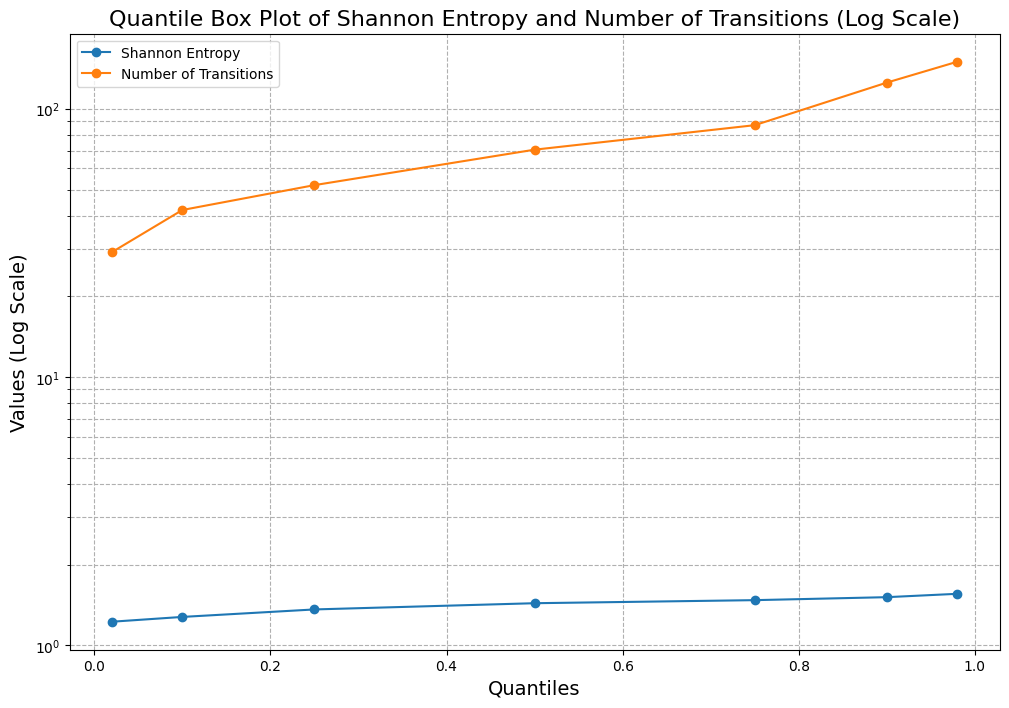

In [42]:
# Create a function to calculate quantiles
def quantile_boxplot(data, quantiles):
    quantile_values = data.quantile(quantiles)
    return quantile_values

# Calculate quantiles for each column
quantile_data = df.apply(quantile_boxplot, quantiles=quantiles)

# Plotting the quantile box plot with logarithmic scale
plt.figure(figsize=(12, 8))
for column in quantile_data.columns:
    plt.plot(quantiles, quantile_data[column], marker='o', label=column)

plt.xlabel('Quantiles', fontsize=14)
plt.ylabel('Values (Log Scale)', fontsize=14)
plt.yscale('log')
plt.title('Quantile Box Plot of Shannon Entropy and Number of Transitions (Log Scale)', fontsize=16)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

<ipython-input-25-31987447d61f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group 

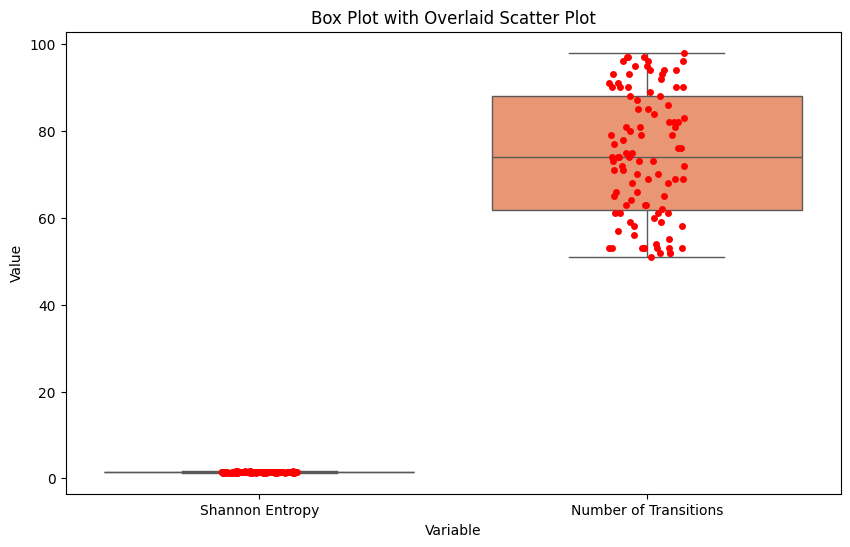

In [25]:
# Melt the DataFrame to long-form for easier plotting with Seaborn
df_melted = df.melt(var_name='Variable', value_name='Value')

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted, palette="Set2")

# Overlay the scatter plot
sns.stripplot(x='Variable', y='Value', data=df_melted, color='red', jitter=True, size=5)

# Adding title and labels
plt.title('Box Plot with Overlaid Scatter Plot')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

**Plotting the data points with BoxPlot & Probability density function**

In [26]:
from scipy.stats import norm

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

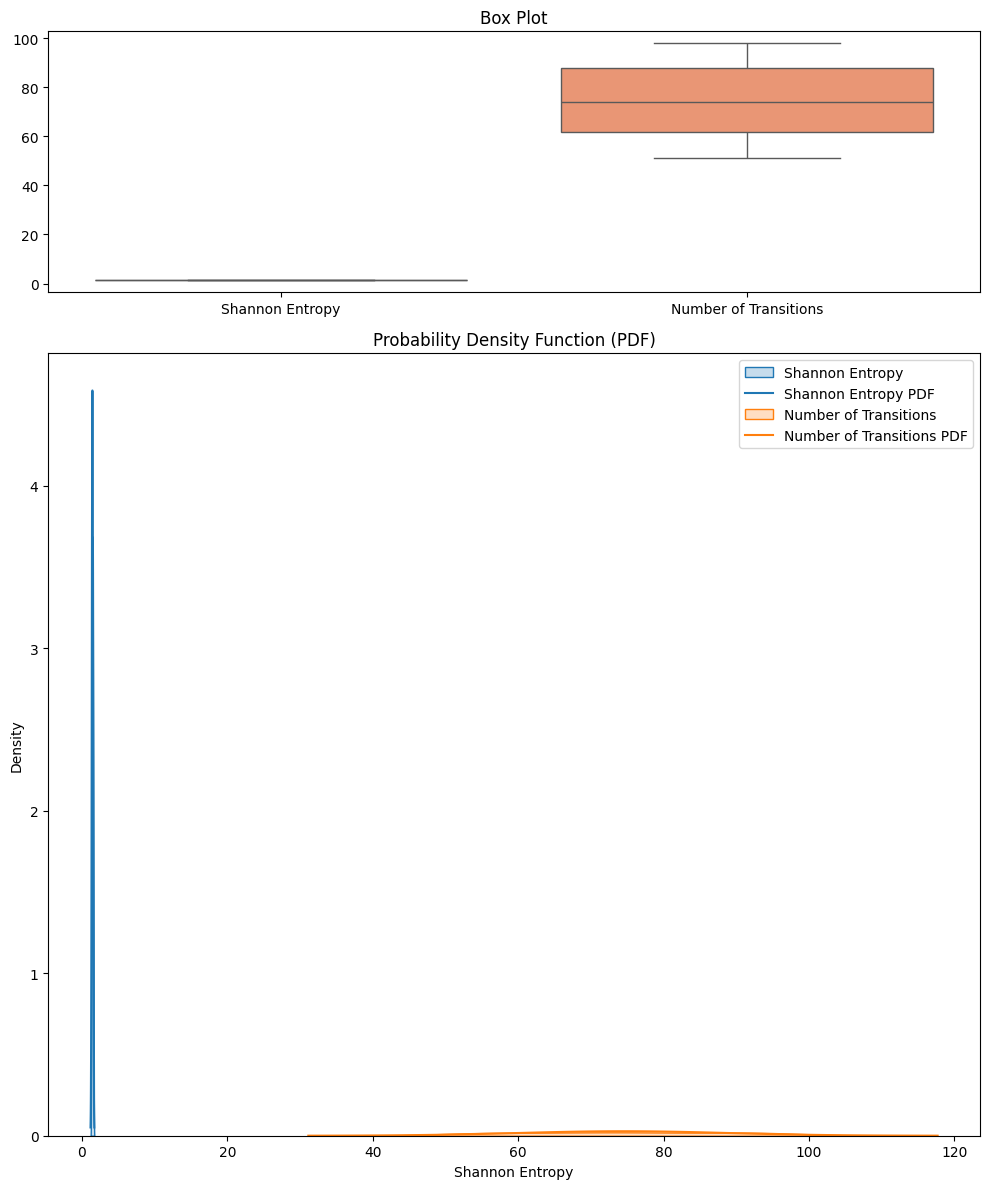

In [28]:
# Create a figure with subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [1, 3]})

# Box plot
sns.boxplot(data=df, ax=ax[0], palette="Set2")
ax[0].set_title('Box Plot')

# Probability Density Function (PDF)
for column in df.columns:
    sns.kdeplot(df[column], ax=ax[1], fill=True, label=column)
    mean = df[column].mean()
    std = df[column].std()
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    y = norm.pdf(x, mean, std)
    ax[1].plot(x, y, label=f'{column} PDF')

ax[1].set_title('Probability Density Function (PDF)')
ax[1].legend()
plt.tight_layout()
plt.show()